In [35]:
import pandas as pd
import matplotlib.pyplot as plt

data_ql_1 = pd.read_csv('./kochi/state_case_ql_30_15/survivorsPerSim_1x10000_1.csv',names=['n','evacuated'])
data_sarsa_1 = pd.read_csv('./kochi/state_sarsa_30_15/survivorsPerSim_1x10000_1.csv',names=['n','evacuated'])
data_mc_1 = pd.read_csv('./kochi/state_mc_30_15/survivorsPerSim_1x10000_1.csv',names=['n','evacuated'])

data_ql_2 = pd.read_csv('./kochi/state_case_ql_30_15/survivorsPerSim_1x10000_2.csv',names=['n','evacuated'])
data_sarsa_2 = pd.read_csv('./kochi/state_sarsa_30_15/survivorsPerSim_1x10000_2.csv',names=['n','evacuated'])
data_mc_2 = pd.read_csv('./kochi/state_mc_30_15/survivorsPerSim_1x10000_2.csv',names=['n','evacuated'])

data_ql_3 = pd.read_csv('./kochi/state_case_ql_30_15/survivorsPerSim_1x6270.csv',names=['n','evacuated'])
data_sarsa_3 = pd.read_csv('./kochi/state_sarsa_30_15/survivorsPerSim_1x8050.csv',names=['n','evacuated'])
data_mc_3 = pd.read_csv('./kochi/state_mc_30_15/survivorsPerSim_1x8050.csv',names=['n','evacuated'])

data_ql = data_ql_1.append(data_ql_2)
data_sarsa = data_sarsa_1.append(data_sarsa_2)
data_mc = data_mc_1.append(data_mc_2)

data_ql = data_ql.append(data_ql_3)
data_sarsa = data_sarsa.append(data_sarsa_3)
data_mc = data_mc.append(data_mc_3)

data_ql.reset_index(inplace=True) #finished 19778.661min)
data_sarsa.reset_index(inplace=True)
data_mc.reset_index(inplace=True)

# data_ql = pd.read_csv('./arahama/state_case_ql_67_7_new/survivorsPerSim_1x100.csv',names=['n','evacuated'])
# data_sarsa = pd.read_csv('./arahama/state_case_sarsa_arahama_67_7_new/survivorsPerSim_1x100.csv',names=['n','evacuated'])
# data_mc = pd.read_csv('./arahama/state_case_mc_arahama_67_7_new/survivorsPerSim_1x100.csv',names=['n','evacuated'])

# data_ql = pd.read_csv('./arahama/state_case_sarsa_arahama_67_7/survivorsPerSim_1x610.csv',names=['n','evacuated'])
# data_mc = pd.read_csv('./arahama/state_case_mc_arahama_67_7/survivorsPerSim_1x610.csv',names=['n','evacuated'])

# data_ql = pd.read_csv('./kochi/state_sarsa_30_15/survivorsPerSim_1x100.csv',names=['n','evacuated'])
# data_mc = pd.read_csv('./kochi/state_mc_30_15/survivorsPerSim_1x100.csv',names=['n','evacuated'])

# data_ql = pd.read_csv('./arahama/state_ql_67_15/survivorsPerSim_1x10.csv',names=['n','evacuated'])
# data_sarsa = pd.read_csv('./arahama/state_sarsa_67_15/survivorsPerSim_1x10.csv',names=['n','evacuated']) #wGLIE
# data_mc = pd.read_csv('./arahama/state_mc_67_15/survivorsPerSim_1x10.csv',names=['n','evacuated']) #woGLIE

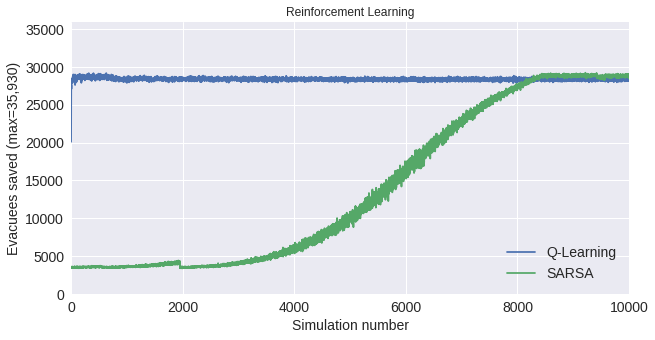

In [41]:
mean_ql = [data_ql.evacuated.iloc[0:i].mean() for i in range(1,data_ql.shape[0])]
mean_ql.insert(0,0)
mean_sarsa = [data_sarsa.evacuated.iloc[0:i].mean() for i in range(1,data_sarsa.shape[0])]
mean_sarsa.insert(0,0)

fig,ax = plt.subplots(figsize=(10,5))
ax = data_ql.evacuated.plot(label="Q-Learning")
# ax.plot(data_ql.index,mean_ql,label='Mean',c='red')

data_sarsa.evacuated.plot(ax=ax,label="SARSA")
# ax.plot(data_sarsa.index,mean_sarsa,label='Mean_SARSA',c='blue')

# data_mc.evacuated.plot(ax=ax,label="Monte Carlo - No GLIE ($\epsilon=0.9$)")

ax.set_xlabel("Simulation number",fontsize=14)
ax.set_ylabel("Evacuees saved (max=35,930)",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.vlines(1049,0,30000,color='white',linestyles='--')
# plt.vlines(547,0,30000,color='white',linestyles='--')
plt.xlim(0,10000)
plt.ylim(0,35930)
# plt.ylim(3000,data_sarsa.evacuated.max())
# plt.text(9.3,1000,'$\downarrow$Full explotation$\downarrow$\n$\epsilon=0.1$',rotation='vertical',usetex=True,fontsize=14)
ax.legend(loc=4,fontsize=14)
plt.title("Reinforcement Learning")
plt.savefig('Kochi_SARSA_10000.png',dpi=300,facecolor='white')

In [10]:
maxe = data_ql.evacuated.max()
print(data_ql.query(f'evacuated=={maxe}'))

maxe = data_sarsa.evacuated.max()
print(data_sarsa.query(f'evacuated=={maxe}'))

     index    n  evacuated
630    630  630      29172
      index     n  evacuated
9217   7263  9214      29225


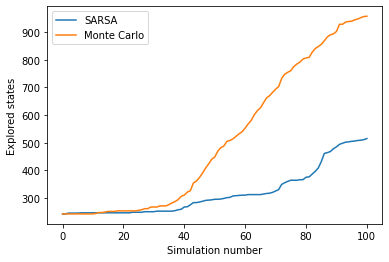

In [18]:
mc_exp = []
sarsa_exp = []
runs = 10
for i in range(runs+1):
    sm = pd.read_csv(f'./arahama/state_mc_67_15/sim_000000{i:03d}.csv')
    mc_exp.append(sm.shape[0])

for i in range(runs+1):
    sm = pd.read_csv(f'./arahama/state_sarsa_67_15/sim_000000{i:03d}.csv')
    sarsa_exp.append(sm.shape[0])
    
import matplotlib.pyplot as plt

x = [i for i in range(101)]
fig, ax = plt.subplots()
ax.plot(x,sarsa_exp,label='SARSA')
ax.plot(x,mc_exp,label='Monte Carlo')
ax.set_xlabel("Simulation number")
ax.set_ylabel("Explored states")
ax.legend()
plt.show()

## 100 Runs

In [40]:
arahama_ql_100 = pd.read_csv('./arahama/state_ql_67_7_100/survivorsPerSim_1x100.csv',names=['n','evacuated'])
arahama_sarsa_100 = pd.read_csv('./arahama/state_sarsa_67_7_100/survivorsPerSim_1x100.csv',names=['n','evacuated'])

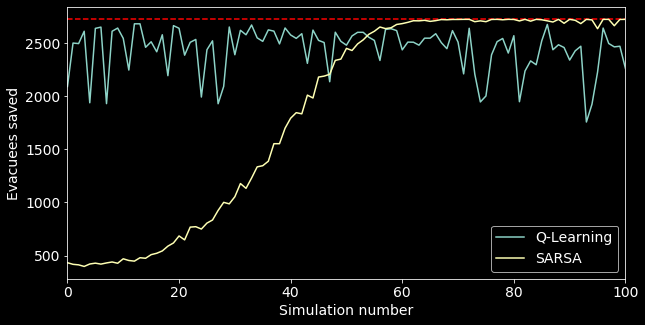

In [50]:
fig,ax = plt.subplots(figsize=(10,5))
ax = arahama_ql_100.evacuated.plot(label="Q-Learning")
arahama_sarsa_100.evacuated.plot(ax=ax,label="SARSA")
ax.set_xlabel("Simulation number",fontsize=14)
ax.set_ylabel("Evacuees saved",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.hlines(2723,0,1000,colors='red',linestyles='--')
# plt.vlines(1049,0,30000,color='white',linestyles='--')
# plt.vlines(547,0,30000,color='white',linestyles='--')
# plt.ylim(3000,data_sarsa.evacuated.max())
# plt.text(9.3,1000,'$\downarrow$Full explotation$\downarrow$\n$\epsilon=0.1$',rotation='vertical',usetex=True,fontsize=14)
ax.legend(loc=4,fontsize=14)

In [42]:
maxe = arahama_ql_100.evacuated.max()
print(arahama_ql_100.query(f'evacuated=={maxe}'))

maxe = arahama_sarsa_100.evacuated.max()
print(arahama_sarsa_100.query(f'evacuated=={maxe}'))

     n  evacuated
12  12       2681
13  13       2681
       n  evacuated
71    71       2723
72    72       2723
77    77       2723
79    79       2723
82    82       2723
84    84       2723
88    88       2723
90    90       2723
93    93       2723
96    96       2723
97    97       2723
100  100       2723


## 100 Runs - QL mod

In [79]:
arahama_ql_mod_100 = pd.read_csv('./arahama/state_ql_mod_67_7_100/survivorsPerSim_1x100.csv',names=['n','evacuated'])
arahama_ql_100 = pd.read_csv('./arahama/state_ql_67_7_100/survivorsPerSim_1x100.csv',names=['n','evacuated'])
arahama_sarsa_100 = pd.read_csv('./arahama/state_sarsa_67_7_100/survivorsPerSim_1x100.csv',names=['n','evacuated'])

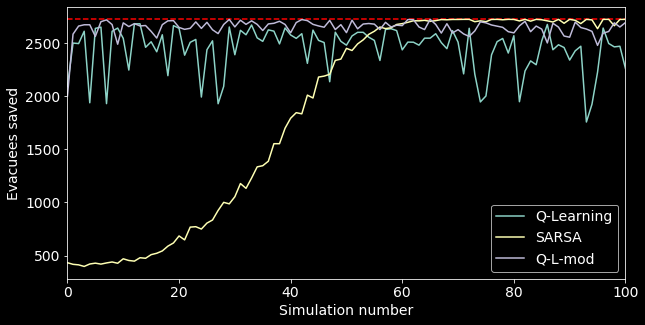

In [82]:
fig,ax = plt.subplots(figsize=(10,5))
ax = arahama_ql_100.evacuated.plot(label="Q-Learning")
arahama_sarsa_100.evacuated.plot(ax=ax,label='SARSA')
arahama_ql_mod_100.evacuated.plot(ax=ax,label="Q-L-mod")
ax.set_xlabel("Simulation number",fontsize=14)
ax.set_ylabel("Evacuees saved",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.hlines(2723,0,1000,colors='red',linestyles='--')
# plt.vlines(1049,0,30000,color='white',linestyles='--')
# plt.vlines(547,0,30000,color='white',linestyles='--')
# plt.ylim(0,3000)
# plt.ylim(3000,data_sarsa.evacuated.max())
# plt.text(9.3,1000,'$\downarrow$Full explotation$\downarrow$\n$\epsilon=0.1$',rotation='vertical',usetex=True,fontsize=14)
ax.legend(loc=4,fontsize=14)

In [78]:
maxe = arahama_ql_100.evacuated.max()
print(arahama_ql_100.query(f'evacuated=={maxe}'))

maxe = arahama_ql_mod_100.evacuated.max()
print(arahama_ql_mod_100.query(f'evacuated=={maxe}'))

     n  evacuated
12  12       2681
13  13       2681
     n  evacuated
65  65       2723


## 10 Runs

In [37]:
arahama_ql_10 = pd.read_csv('./arahama/state_ql_67_7_10/survivorsPerSim_1x10.csv',names=['n','evacuated'])
arahama_sarsa_10 = pd.read_csv('./arahama/state_sarsa_67_7_10/survivorsPerSim_1x10.csv',names=['n','evacuated'])

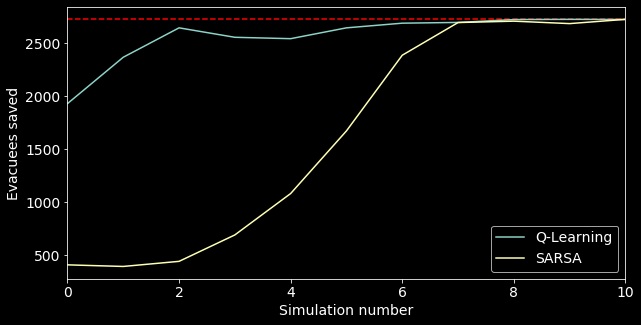

In [51]:
fig,ax = plt.subplots(figsize=(10,5))
ax = arahama_ql_10.evacuated.plot(label="Q-Learning")
arahama_sarsa_10.evacuated.plot(ax=ax,label="SARSA")
ax.set_xlabel("Simulation number",fontsize=14)
ax.set_ylabel("Evacuees saved",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.hlines(2723,0,1000,colors='red',linestyles='--')
# plt.vlines(1049,0,30000,color='white',linestyles='--')
# plt.vlines(547,0,30000,color='white',linestyles='--')
# plt.ylim(3000,data_sarsa.evacuated.max())
# plt.text(9.3,1000,'$\downarrow$Full explotation$\downarrow$\n$\epsilon=0.1$',rotation='vertical',usetex=True,fontsize=14)
ax.legend(loc=4,fontsize=14)

In [43]:
maxe = arahama_ql_10.evacuated.max()
print(arahama_ql_10.query(f'evacuated=={maxe}'))

maxe = arahama_sarsa_10.evacuated.max()
print(arahama_sarsa_10.query(f'evacuated=={maxe}'))

   n  evacuated
9  9       2723
     n  evacuated
10  10       2723


## 1000 RUNS

In [83]:
arahama_ql_1000 = pd.read_csv('./arahama/state_ql_67_7_1000/survivorsPerSim_1x1000.csv',names=['n','evacuated'])
arahama_ql_mod_1000 = pd.read_csv('./arahama/state_ql_mod_67_7_1000/survivorsPerSim_1x1000.csv',names=['n','evacuated'])
arahama_sarsa_1000 = pd.read_csv('./arahama/state_sarsa_67_7_1000/survivorsPerSim_1x1000.csv',names=['n','evacuated'])

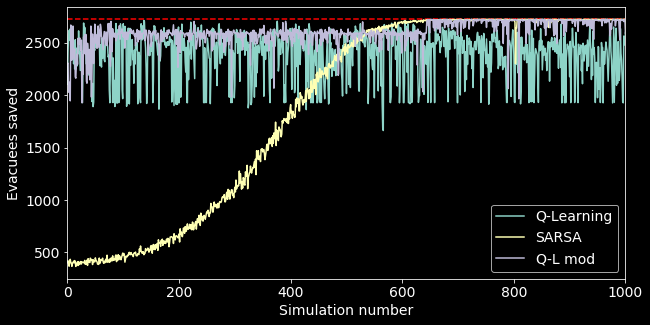

In [86]:
fig,ax = plt.subplots(figsize=(10,5))
ax = arahama_ql_1000.evacuated.plot(label="Q-Learning")
arahama_sarsa_1000.evacuated.plot(ax=ax,label="SARSA")
arahama_ql_mod_1000.evacuated.plot(ax=ax,label="Q-L mod")
ax.set_xlabel("Simulation number",fontsize=14)
ax.set_ylabel("Evacuees saved",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.hlines(2723,0,1000,colors='red',linestyles='--')
# plt.vlines(1049,0,30000,color='white',linestyles='--')
# plt.vlines(547,0,30000,color='white',linestyles='--')
# plt.ylim(3000,data_sarsa.evacuated.max())
# plt.text(9.3,1000,'$\downarrow$Full explotation$\downarrow$\n$\epsilon=0.1$',rotation='vertical',usetex=True,fontsize=14)
ax.legend(loc=4,fontsize=14)

In [87]:
maxe = arahama_ql_1000.evacuated.max()
print(arahama_ql_1000.query(f'evacuated=={maxe}'))

maxe = arahama_ql_mod_1000.evacuated.max()
print(arahama_ql_mod_1000.query(f'evacuated=={maxe}'))

       n  evacuated
605  605       2713
       n  evacuated
646  646       2723
650  650       2723
652  652       2723
669  669       2723
675  675       2723
680  680       2723
685  685       2723
704  704       2723
712  712       2723
723  723       2723
724  724       2723
730  730       2723
732  732       2723
735  735       2723
739  739       2723
743  743       2723
758  758       2723
760  760       2723
771  771       2723
776  776       2723
800  800       2723
803  803       2723
815  815       2723
836  836       2723
839  839       2723
840  840       2723
841  841       2723
847  847       2723
850  850       2723
852  852       2723
854  854       2723
866  866       2723
880  880       2723
885  885       2723
945  945       2723
957  957       2723
961  961       2723
964  964       2723
965  965       2723
968  968       2723
979  979       2723
980  980       2723
986  986       2723
993  993       2723
999  999       2723


In [92]:
mean_ql = [arahama_ql_1000.evacuated.iloc[0:i].max() for i in range(1,arahama_ql_1000.shape[0])]
mean_ql.insert(0,0)
mean_ql_mod = [arahama_ql_mod_1000.evacuated.iloc[0:i].max() for i in range(1,arahama_ql_mod_1000.shape[0])]
mean_ql_mod.insert(0,0)
mean_sarsa = [arahama_sarsa_1000.evacuated.iloc[0:i].max() for i in range(1,arahama_sarsa_1000.shape[0])]
mean_sarsa.insert(0,0)


In [103]:
std_ql = [arahama_ql_1000.evacuated.iloc[0:i].std() for i in range(1,arahama_ql_1000.shape[0])]
std_ql.insert(0,0)
std_ql_mod = [arahama_ql_mod_1000.evacuated.iloc[0:i].std() for i in range(1,arahama_ql_mod_1000.shape[0])]
std_ql_mod.insert(0,0)
std_sarsa = [arahama_sarsa_1000.evacuated.iloc[0:i].std() for i in range(1,arahama_sarsa_1000.shape[0])]
std_sarsa.insert(0,0)


Text(0, 0.5, 'Evacuated population (max=2,723)')

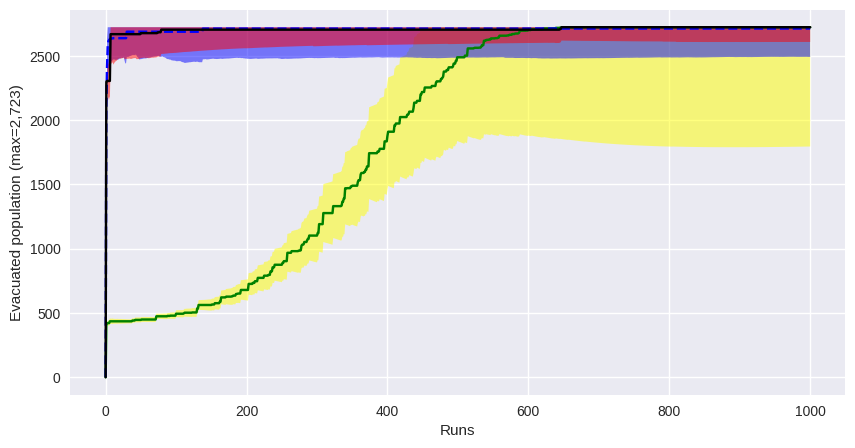

In [162]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')

fig,ax = plt.subplots(figsize=(10,5))
runs = np.arange(len(mean_ql))

#SARSA
ax.plot(mean_sarsa,color='green')
mean_sarsa_plus = [ x+y if x+y <= 2723 else 2723 for x,y in zip(mean_sarsa,std_sarsa) ]
mean_sarsa_minus = [ x-y for x,y in zip(mean_sarsa,std_sarsa) ]
ax.fill_between(runs,mean_sarsa_minus,mean_sarsa_plus,facecolor='yellow',alpha=0.5)

#QL
ax.plot(mean_ql,color='blue',ls='--')
mean_ql_plus = [ x+y if x+y <= 2723 else 2723 for x,y in zip(mean_ql,std_ql) ]
mean_ql_minus = [ x-y for x,y in zip(mean_ql,std_ql) ]
ax.fill_between(runs,mean_ql_minus,mean_ql_plus,facecolor='blue',alpha=0.5)

#QLmod
ax.plot(mean_ql_mod,color='k')
mean_ql_mod_plus = [ x+y if x+y <= 2723 else 2723 for x,y in zip(mean_ql_mod,std_ql_mod) ]
mean_ql_mod_minus = [ x-y for x,y in zip(mean_ql_mod,std_ql_mod) ]
ax.fill_between(runs,mean_ql_mod_minus,mean_ql_mod_plus,facecolor='red',alpha=0.5)

plt.xlabel("Runs")
plt.ylabel("Evacuated population (max=2,723)")

## [Kochi] 1000 runs to compare QL-mod and SARSA

In [1]:
import pandas as pd

In [45]:
kochi_ql_mod_1000 = pd.read_csv('./kochi/state_ql_mod_30_15_1000/survivorsPerSim_1x1000.csv',names=['n','evacuated'])
kochi_sarsa_1000 = pd.read_csv('./kochi/state_sarsa_30_15_1000/survivorsPerSim_1x1000.csv',names=['n','evacuated'])

In [6]:
maxe = kochi_ql_mod_1000.evacuated.max()
print(kochi_ql_mod_1000.query(f'evacuated=={maxe}'))

maxe = kochi_sarsa_1000.evacuated.max()
print(kochi_sarsa_1000.query(f'evacuated=={maxe}'))

       n  evacuated
153  153      28482
       n  evacuated
970  970      29087


In [3]:
mean_ql_mod_kochi = [kochi_ql_mod_1000.evacuated.iloc[i-10:i].mean() for i in range(10,kochi_ql_mod_1000.shape[0])]
mean_ql_mod_kochi.insert(0,kochi_ql_mod_1000.evacuated[0])

mean_sarsa_kochi = [kochi_sarsa_1000.evacuated.iloc[i-10:i].mean() for i in range(10,kochi_sarsa_1000.shape[0])]
mean_sarsa_kochi.insert(0,kochi_sarsa_1000.evacuated[0])


In [9]:

std_ql_mod_kochi = [kochi_ql_mod_1000.evacuated.iloc[0:i].std() for i in range(0,kochi_ql_mod_1000.shape[0])]
std_ql_mod_kochi.insert(0,0)

std_sarsa_kochi = [kochi_sarsa_1000.evacuated.iloc[0:i].std() for i in range(0,kochi_sarsa_1000.shape[0])]
std_sarsa_kochi.insert(0,0)


In [10]:

std_ql_mod_kochi = [kochi_ql_mod_1000.evacuated.iloc[i-10:i].std() for i in range(10,kochi_ql_mod_1000.shape[0])]
std_ql_mod_kochi.insert(0,0)

std_sarsa_kochi = [kochi_sarsa_1000.evacuated.iloc[i-10:i].std() for i in range(10,kochi_sarsa_1000.shape[0])]
std_sarsa_kochi.insert(0,0)


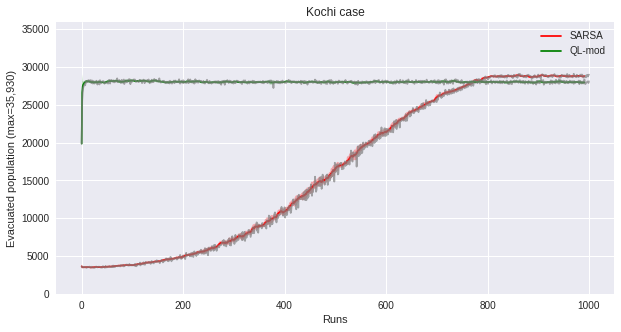

In [54]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fig,ax = plt.subplots(figsize=(10,5))

# #SARSA
runs_kochi = np.arange(len(mean_sarsa_kochi))
ax.plot(mean_sarsa_kochi,color='red',label='SARSA')
mean_sarsa_kochi_plus = [ x+y if x+y <= 35930 else 35930 for x,y in zip(mean_sarsa_kochi,std_sarsa_kochi) ]
mean_sarsa_kochi_minus = [ x-y for x,y in zip(mean_sarsa_kochi,std_sarsa_kochi) ]
ax.fill_between(runs_kochi,mean_sarsa_kochi_minus,mean_sarsa_kochi_plus,facecolor='red',alpha=0.3)
ax.plot(kochi_sarsa_1000.evacuated,color='gray',alpha=0.7)

#QLmod
runs_kochi = np.arange(len(mean_ql_mod_kochi))
ax.plot(mean_ql_mod_kochi,color='green',label='QL-mod')
mean_ql_mod_kochi_plus = [ x+y if x+y <= 35930 else 35930 for x,y in zip(mean_ql_mod_kochi,std_ql_mod_kochi) ]
mean_ql_mod_kochi_minus = [ x-y for x,y in zip(mean_ql_mod_kochi,std_ql_mod_kochi) ]
ax.fill_between(runs_kochi,mean_ql_mod_kochi_minus,mean_ql_mod_kochi_plus,facecolor='green',alpha=0.3)
ax.plot(kochi_ql_mod_1000.evacuated,color='gray',alpha=0.7)

plt.ylim(0,35930)
plt.xlabel("Runs")
plt.ylabel("Evacuated population (max=35,930)")
plt.legend()
plt.title("Kochi case")
plt.savefig('./kochi_ql_vs_sarsa.png',dpi=300,facecolor='white')

> QL modified ended at t=3166.22 min but the max value: 28970 occurred at index 153 out of 1000 runs.  
> SARSA ended at t=4586.62 min with final value 29087 occurred at 970 out of 1000 runs.

Text(0.5, 1.0, 'Kochi case')

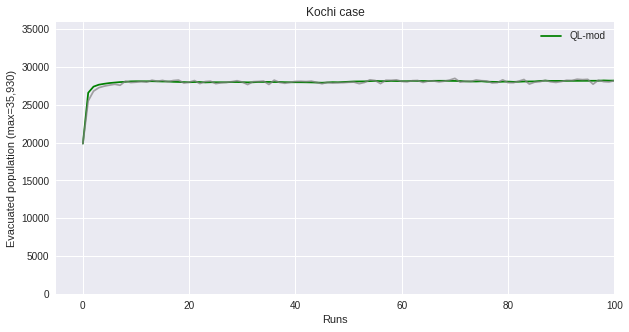

In [45]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fig,ax = plt.subplots(figsize=(10,5))

# # #SARSA
# runs_kochi = np.arange(len(mean_sarsa_kochi))
# ax.plot(mean_sarsa_kochi,color='red',label='SARSA')
# mean_sarsa_kochi_plus = [ x+y if x+y <= 35930 else 35930 for x,y in zip(mean_sarsa_kochi,std_sarsa_kochi) ]
# mean_sarsa_kochi_minus = [ x-y for x,y in zip(mean_sarsa_kochi,std_sarsa_kochi) ]
# ax.fill_between(runs_kochi,mean_sarsa_kochi_minus,mean_sarsa_kochi_plus,facecolor='red',alpha=0.3)
# ax.plot(kochi_sarsa_1000.evacuated,color='gray',alpha=0.7)

#QLmod
runs_kochi = np.arange(len(mean_ql_mod_kochi))
ax.plot(mean_ql_mod_kochi,color='green',label='QL-mod')
# mean_ql_mod_kochi_plus = [ x+y if x+y <= 35930 else 35930 for x,y in zip(mean_ql_mod_kochi,std_ql_mod_kochi) ]
# mean_ql_mod_kochi_minus = [ x-y for x,y in zip(mean_ql_mod_kochi,std_ql_mod_kochi) ]
# ax.fill_between(runs_kochi,mean_ql_mod_kochi_minus,mean_ql_mod_kochi_plus,facecolor='green',alpha=0.3)
ax.plot(kochi_ql_mod_1000.evacuated,color='gray',alpha=0.7)

plt.xlim(-5,100)
plt.ylim(0,35930)
plt.xlabel("Runs")
plt.ylabel("Evacuated population (max=35,930)")
plt.legend()
plt.title("Kochi case")

# Comparison Kochi 10, 100 , 1000

In [30]:
kochi_ql_mod_10 = pd.read_csv('./kochi/state_ql_mod_30_15_10/survivorsPerSim_1x10.csv',names=['n','evacuated'])
kochi_ql_mod_100 = pd.read_csv('./kochi/state_ql_mod_30_15_100/survivorsPerSim_1x100.csv',names=['n','evacuated'])
kochi_ql_mod_1000 = pd.read_csv('./kochi/state_ql_mod_30_15_1000/survivorsPerSim_1x1000.csv',names=['n','evacuated'])


In [47]:
x10 = np.arange(0,1.1,1/10)
x100 = np.arange(0,1.01,1/100)
x1000 = np.arange(0,1.001,1/1000)
x10000 = np.arange(0,1.0002,1/10000)

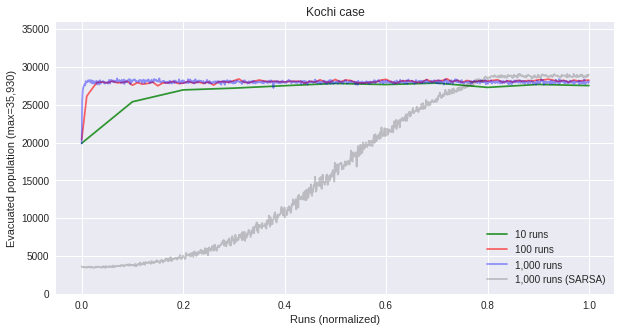

In [53]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fig,ax = plt.subplots(figsize=(10,5))

#QLmod
ax.plot(x10,kochi_ql_mod_10.evacuated,color='green',alpha=0.8,label='10 runs')
ax.plot(x100,kochi_ql_mod_100.evacuated,color='red',alpha=0.6,label='100 runs')
ax.plot(x1000,kochi_ql_mod_1000.evacuated,color='blue',alpha=0.4,label='1,000 runs')
ax.plot(x1000,kochi_sarsa_1000.evacuated,color='k',alpha=0.2,label='1,000 runs (SARSA)')

plt.ylim(0,35930)
plt.xlabel("Runs (normalized)")
plt.ylabel("Evacuated population (max=35,930)")
plt.legend()
plt.title("Kochi case")
plt.savefig('./kochi_ql_runs.png',dpi=300,facecolor='white')

In [ ]:
maxe = kochi_ql_mod_1000.evacuated.max()
print(kochi_ql_mod_1000.query(f'evacuated=={maxe}'))

maxe = kochi_sarsa_1000.evacuated.max()
print(kochi_sarsa_1000.query(f'evacuated=={maxe}'))

In [ ]:
mc_exp = []
ql_exp = []
sarsa_exp = []
runs = 10_000
for i in range(runs+1):
    sm = pd.read_csv(f'./kochi/state_case_ql_30_15/sim_0000{i:05d}.csv')
    ql_exp.append(sm.shape[0])

for i in range(runs+1):
    sm = pd.read_csv(f'./kochi/state_sarsa_30_15/sim_0000{i:05d}.csv')
    sarsa_exp.append(sm.shape[0])

for i in range(runs+1):
    sm = pd.read_csv(f'./kochi/state_mc_30_15/sim_0000{i:05d}.csv')
    mc_exp.append(sm.shape[0])

In [22]:
diff = ql_exp[0]-sarsa_exp[0]
ql_exp2 = [i - diff for i in ql_exp]

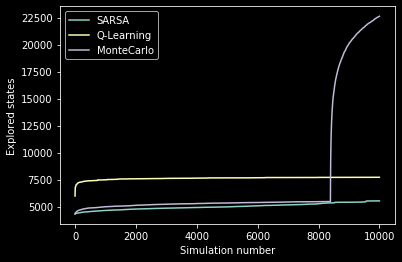

In [25]:
    
import matplotlib.pyplot as plt

x = [i for i in range(runs+1)]
fig, ax = plt.subplots()
ax.plot(x,sarsa_exp,label='SARSA')
ax.plot(x,ql_exp,label='Q-Learning')
ax.plot(x,mc_exp,label='MonteCarlo')
ax.set_xlabel("Simulation number")
ax.set_ylabel("Explored states")
# plt.ylim(0,8000)
ax.legend()
plt.show()

In [ ]:
best_policy = pd.read_csv(f'./kochi/state_case_ql_30_15/sim_000000630.csv')

In [ ]:
best_policy.head()